# Bloch Sphere Visualization

**Companion notebook for:** [`bloch-sphere-intuition.md`](./bloch-sphere-intuition.md)

This notebook demonstrates:
- The Bloch sphere as the geometric home of single-qubit states
- Latitude = probability, longitude = phase
- How different states map to points on the sphere
- Measurement as projection to poles

In [3]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Pauli
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

np.set_printoptions(precision=3, suppress=True)

## 1. Basic States on the Bloch Sphere

Let's visualize the standard basis states and superpositions.

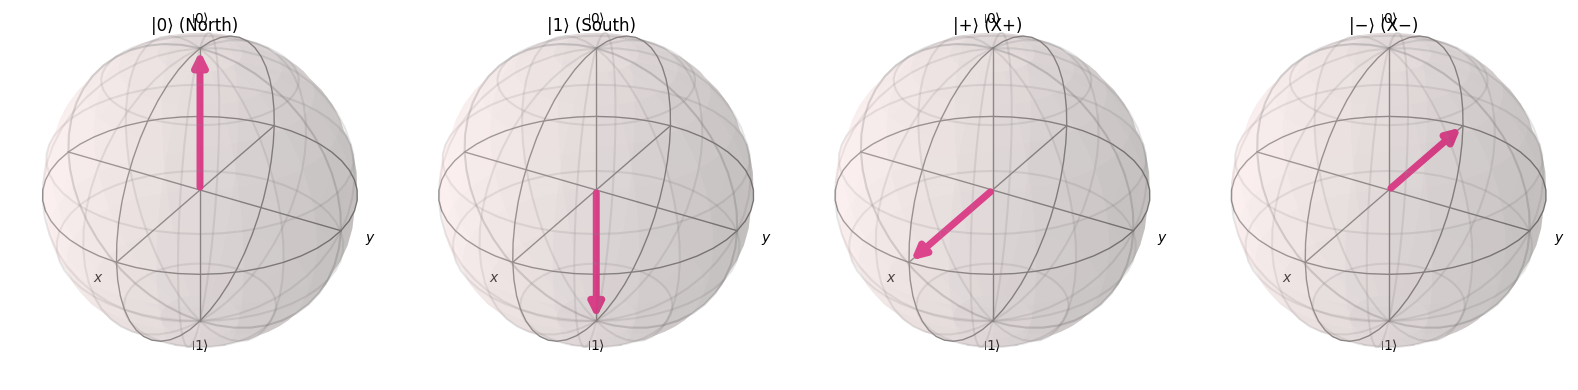

Key observations:
  |0⟩ and |1⟩ are at the poles (0% and 100% probability of |1⟩)
  |+⟩ and |−⟩ are on the equator (50/50 probability)
  They differ in phase (longitude), not probability (latitude)


In [4]:
# Define states
state_0 = Statevector([1, 0])                    # |0⟩ - North pole
state_1 = Statevector([0, 1])                    # |1⟩ - South pole
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])    # |+⟩ - Equator (x-axis)
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])  # |−⟩ - Equator (-x-axis)

states = [state_0, state_1, state_plus, state_minus]
labels = ['|0⟩ (North)', '|1⟩ (South)', '|+⟩ (X+)', '|−⟩ (X−)']

fig, axes = plt.subplots(1, 4, figsize=(16, 4), subplot_kw={'projection': '3d'})

for ax, state, label in zip(axes, states, labels):
    plot_bloch_vector([
        state.expectation_value(Pauli('X')),
        state.expectation_value(Pauli('Y')),
        state.expectation_value(Pauli('Z'))
    ], ax=ax)    
    ax.set_title(label, fontsize=12)

plt.tight_layout()
plt.show()

print("Key observations:")
print("  |0⟩ and |1⟩ are at the poles (0% and 100% probability of |1⟩)")
print("  |+⟩ and |−⟩ are on the equator (50/50 probability)")
print("  They differ in phase (longitude), not probability (latitude)")

## 2. Latitude Controls Probability

States at different latitudes have different measurement probabilities.

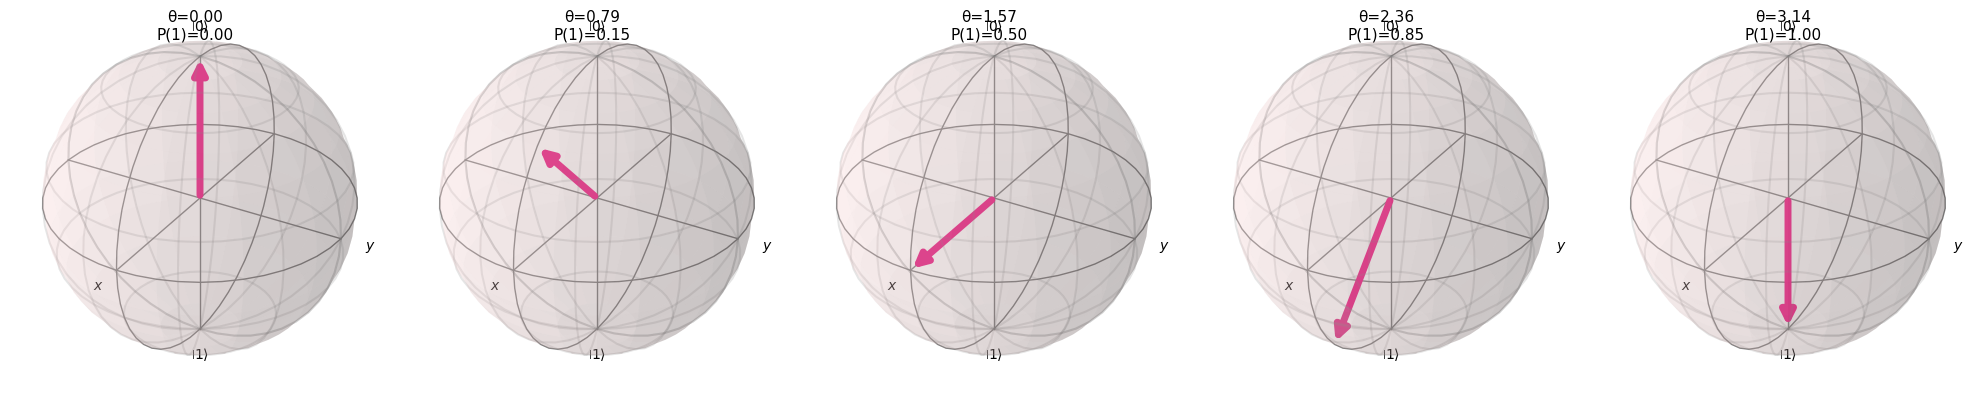

As we move from north pole to south pole:
  Probability of |1⟩ increases from 0 to 1
  Latitude directly controls measurement outcomes


In [5]:
# Create states at different latitudes (same longitude)
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
phi = 0  # Keep phase constant

fig, axes = plt.subplots(1, len(thetas), figsize=(20, 4), subplot_kw={'projection': '3d'})

for ax, theta in zip(axes, thetas):
    # Create state using Bloch sphere parametrization
    state = Statevector([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])
    plot_bloch_vector([
        state.expectation_value(Pauli('X')),
        state.expectation_value(Pauli('Y')),
        state.expectation_value(Pauli('Z'))
    ], ax=ax)
    
    p1 = np.sin(theta/2)**2  # Probability of measuring |1⟩
    ax.set_title(f'θ={theta:.2f}\nP(1)={p1:.2f}', fontsize=11)

plt.tight_layout()
plt.show()

print("As we move from north pole to south pole:")
print("  Probability of |1⟩ increases from 0 to 1")
print("  Latitude directly controls measurement outcomes")

## 3. Longitude Controls Phase

States around the equator have the same probabilities but different phases.

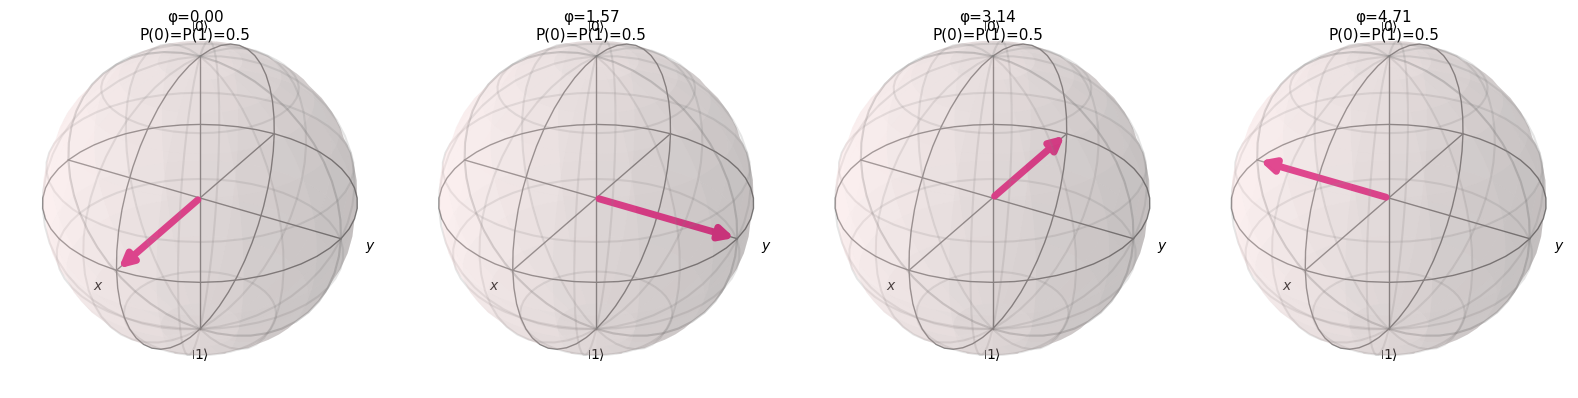

All these states give the same measurement probabilities!
But they are DIFFERENT states (different phases).
Phase becomes visible when you apply gates.


In [6]:
# Create states around the equator (constant latitude, varying longitude)
theta = np.pi/2  # Equator
phis = np.linspace(0, 2*np.pi, 4, endpoint=False)

fig, axes = plt.subplots(1, len(phis), figsize=(16, 4), subplot_kw={'projection': '3d'})

for ax, phi in zip(axes, phis):
    state = Statevector([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])
    plot_bloch_vector([
        state.expectation_value(Pauli('X')),
        state.expectation_value(Pauli('Y')),
        state.expectation_value(Pauli('Z'))
    ], ax=ax)
    ax.set_title(f'φ={phi:.2f}\nP(0)=P(1)=0.5', fontsize=11)

plt.tight_layout()
plt.show()

print("All these states give the same measurement probabilities!")
print("But they are DIFFERENT states (different phases).")
print("Phase becomes visible when you apply gates.")

## 4. Arbitrary State on the Sphere

Any point on the sphere represents a valid quantum state.

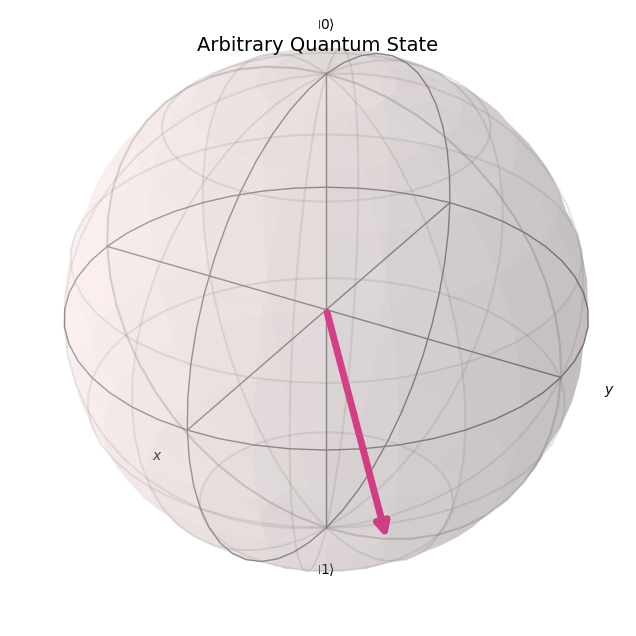

State vector: [0.5  +0.j    0.612+0.612j]

In Dirac notation:
|ψ⟩ = 0.500|0⟩ + (0.612 + 0.612i)|1⟩

Measurement probabilities:
  P(0) = |0.500|² = 0.250
  P(1) = |0.612+0.612j|² = 0.750

Bloch sphere parameters:
  θ = 2.094 rad (120.0°)
  φ = 0.785 rad (45.0°)


: 

In [ ]:
# Pick an arbitrary point
theta = 2*np.pi/3  # 120 degrees from north pole
phi = np.pi/4      # 45 degrees around

# Create the state
a = np.cos(theta/2)
b = np.exp(1j*phi) * np.sin(theta/2)
state = Statevector([a, b])

# Visualize
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plot_bloch_vector([
    state.expectation_value(Pauli('X')),
    state.expectation_value(Pauli('Y')),
    state.expectation_value(Pauli('Z'))
], ax=ax)
ax.set_title('Arbitrary Quantum State', fontsize=14)
plt.show()

# Show the math
print(f"State vector: {state.data}")
print(f"\nIn Dirac notation:")
print(f"|ψ⟩ = {a:.3f}|0⟩ + ({b.real:.3f} + {b.imag:.3f}i)|1⟩")
print(f"\nMeasurement probabilities:")
print(f"  P(0) = |{a:.3f}|² = {abs(a)**2:.3f}")
print(f"  P(1) = |{b:.3f}|² = {abs(b)**2:.3f}")
print(f"\nBloch sphere parameters:")
print(f"  θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)")
print(f"  φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)")

## Summary

From this notebook, you should understand:

1. **The Bloch sphere is precise** — every point is a valid quantum state
2. **Latitude = probability** — north pole is |0⟩, south pole is |1⟩
3. **Longitude = phase** — going around the equator changes phase, not probabilities
4. **Two parameters** — θ (theta) controls probability, φ (phi) controls phase

**Next:** [Single-Qubit Gates](./single-qubit-gates.ipynb)  
Where we'll see how gates rotate the state on the Bloch sphere.